In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns
import os
import warnings
warnings.filterwarnings(action='ignore')

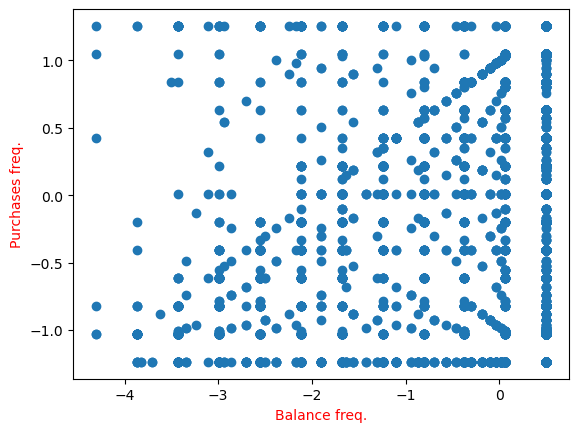

In [2]:
df = pd.read_csv('../data/CC GENERAL.csv')
df = df.dropna()
df = df.drop('CUST_ID', axis = 1)
mean = df.mean()
std = df.std()
df = (df - mean) / std
plt.xlabel('Balance freq.', color = 'Red')
plt.ylabel('Purchases freq.', color = 'Red')
plt.scatter(df['BALANCE_FREQUENCY'],df['PURCHASES_FREQUENCY'])
plt.show()

In [3]:
df = df.drop('TENURE', axis = 1)
df = df.drop('BALANCE_FREQUENCY', axis = 1)
df = df.drop('BALANCE', axis = 1)
df = df.drop('PURCHASES', axis = 1) 
df = df.drop('INSTALLMENTS_PURCHASES', axis = 1) 
df = df.drop('ONEOFF_PURCHASES', axis = 1) 
df = df.drop('CASH_ADVANCE', axis = 1)
df = df.drop('PAYMENTS', axis = 1)
df = df.drop('MINIMUM_PAYMENTS', axis = 1)
df = df.drop('PURCHASES_TRX', axis = 1)
df = df.drop('CASH_ADVANCE_TRX', axis = 1)
df

,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PRC_FULL_PAYMENT
0,-0.820721,-0.686240,-0.717137,-0.681913,-0.962520,-0.537696
1,-1.236067,-0.686240,-0.926468,0.556990,0.677165,0.212368
2,1.256004,2.646498,-0.926468,-0.681913,0.813805,-0.537696
4,-1.028396,-0.408513,-0.926468,-0.681913,-0.907864,-0.537696
5,0.425314,-0.686240,0.538851,-0.681913,-0.743895,-0.537696
...,...,...,...,...,...,...
8943,-0.820721,-0.130782,-0.926468,-0.681913,-1.099160,-0.537696
8945,1.256004,-0.686240,1.166845,-0.681913,-0.962520,1.149949
8947,0.840658,-0.686240,0.748184,-0.681913,-0.962520,0.306126
8948,-1.236067,-0.686240,-0.926468,0.144024,-1.099160,0.306126


Text(0.5, 1.0, 'Elbow method')

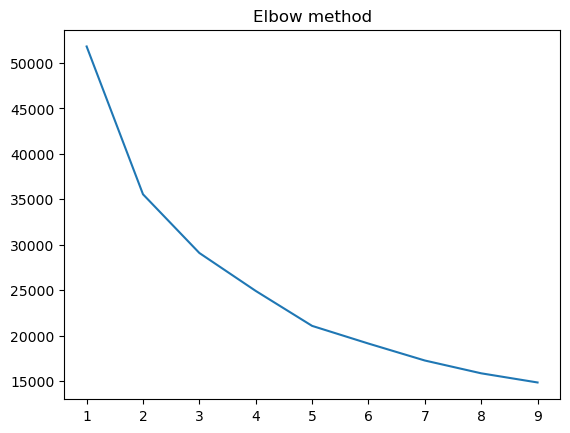

In [4]:
def distance_by_n(x, n):
    model = KMeans(n_clusters=n, n_init = 10)
    model.fit(x)
    return model.inertia_
distances = [distance_by_n(df, n) for n in range(1, 10)]
plt.plot(range(1, 10), distances)
plt.title('Elbow method')

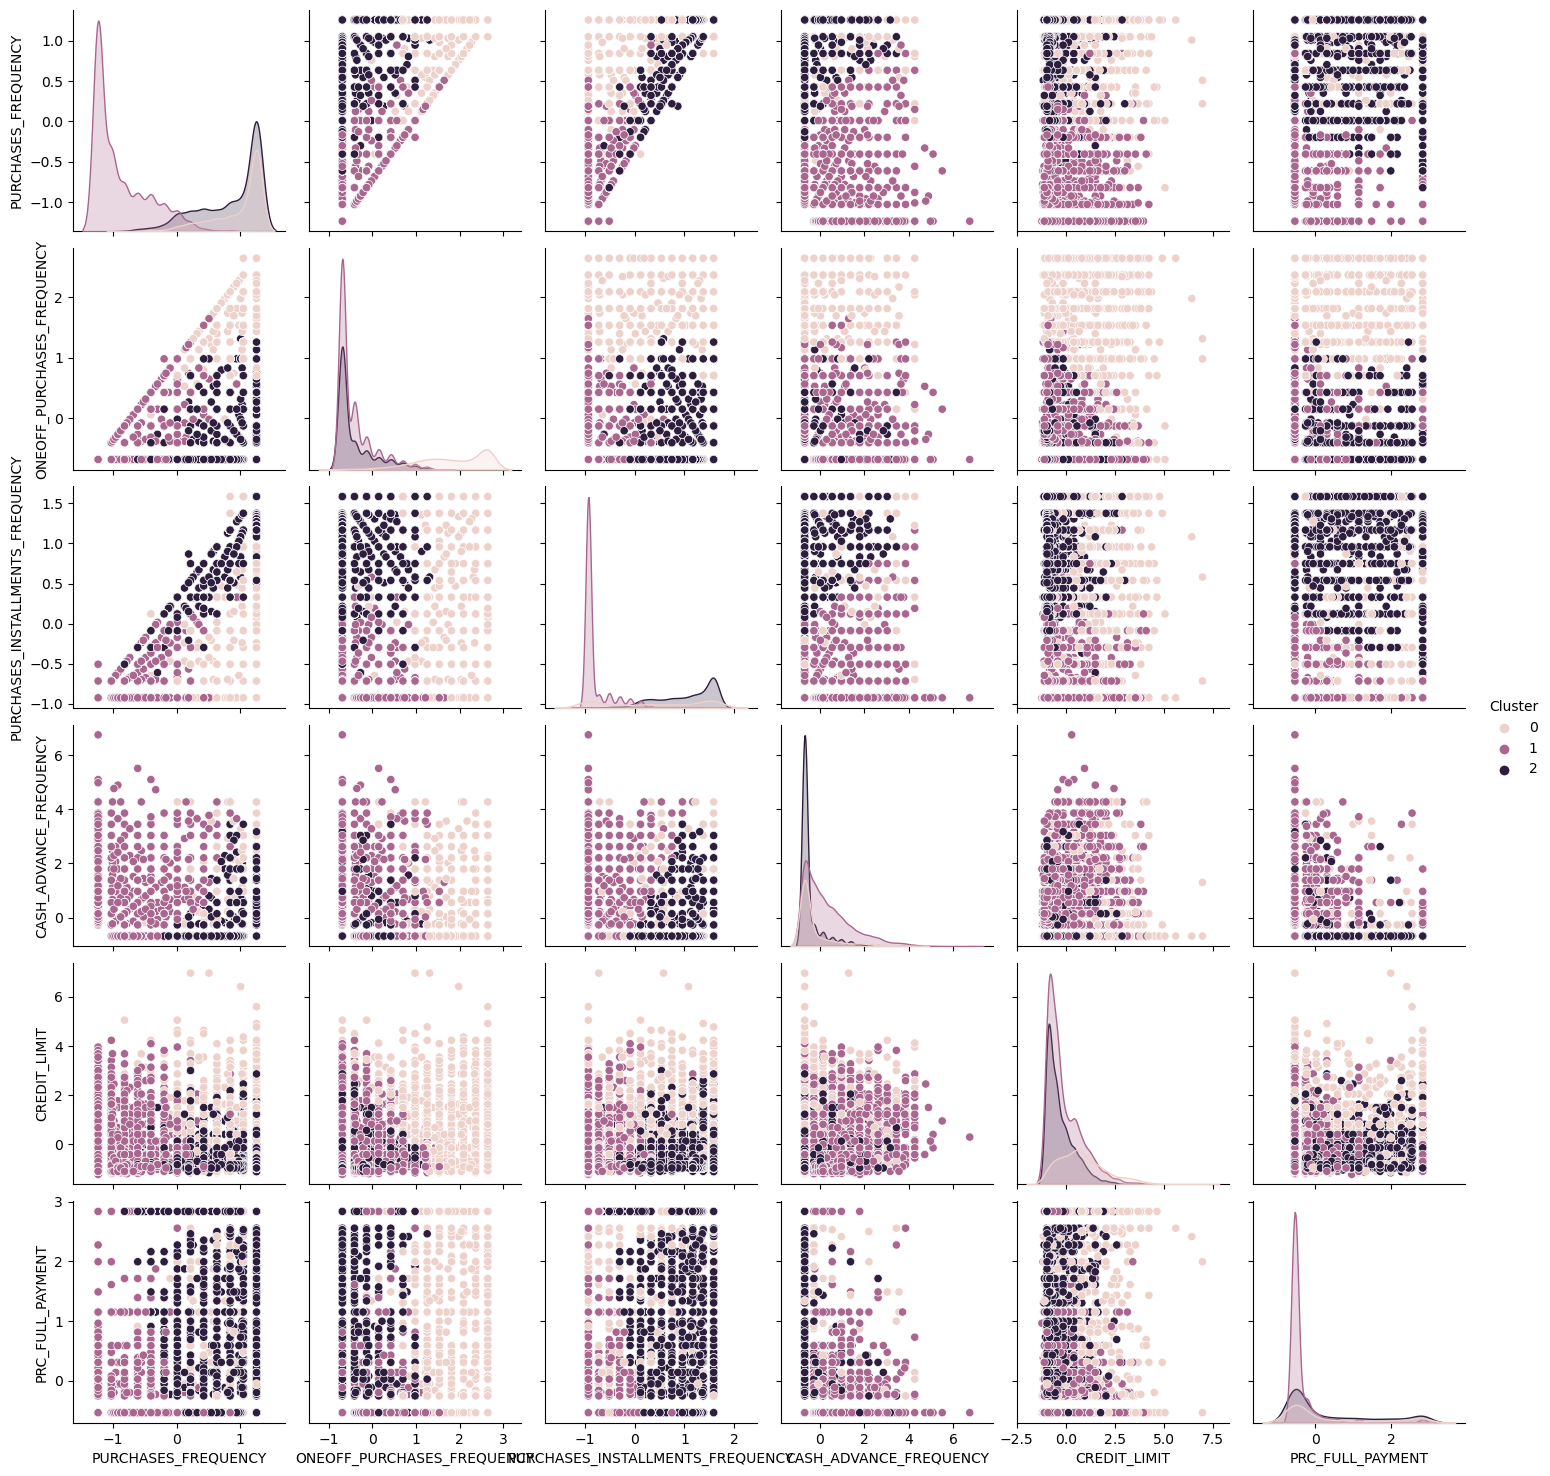

In [5]:
model = KMeans(n_clusters=3, n_init = 10)
result = df
result['Cluster'] = model.fit_predict(df)
sns.pairplot(result, hue = 'Cluster', kind = 'scatter')

Итоги неутешительные. Гипотеза плохо подошла к данным. 
Группы можно описать так: 
    Розовые - малоактивные пользователи карт.
    Черные - активно пользуются кредитными возможностями, часто вносят предоплату за товары. 
    Желтые - активно совершают покупки, причем меньше пользуются кредитными возможностями (по большей части дебетовыми).
Таким образом, рекламодателей заинтересуют желтые и черные кластеры пользователей. 

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage
df = df.drop('Cluster', axis = 1)

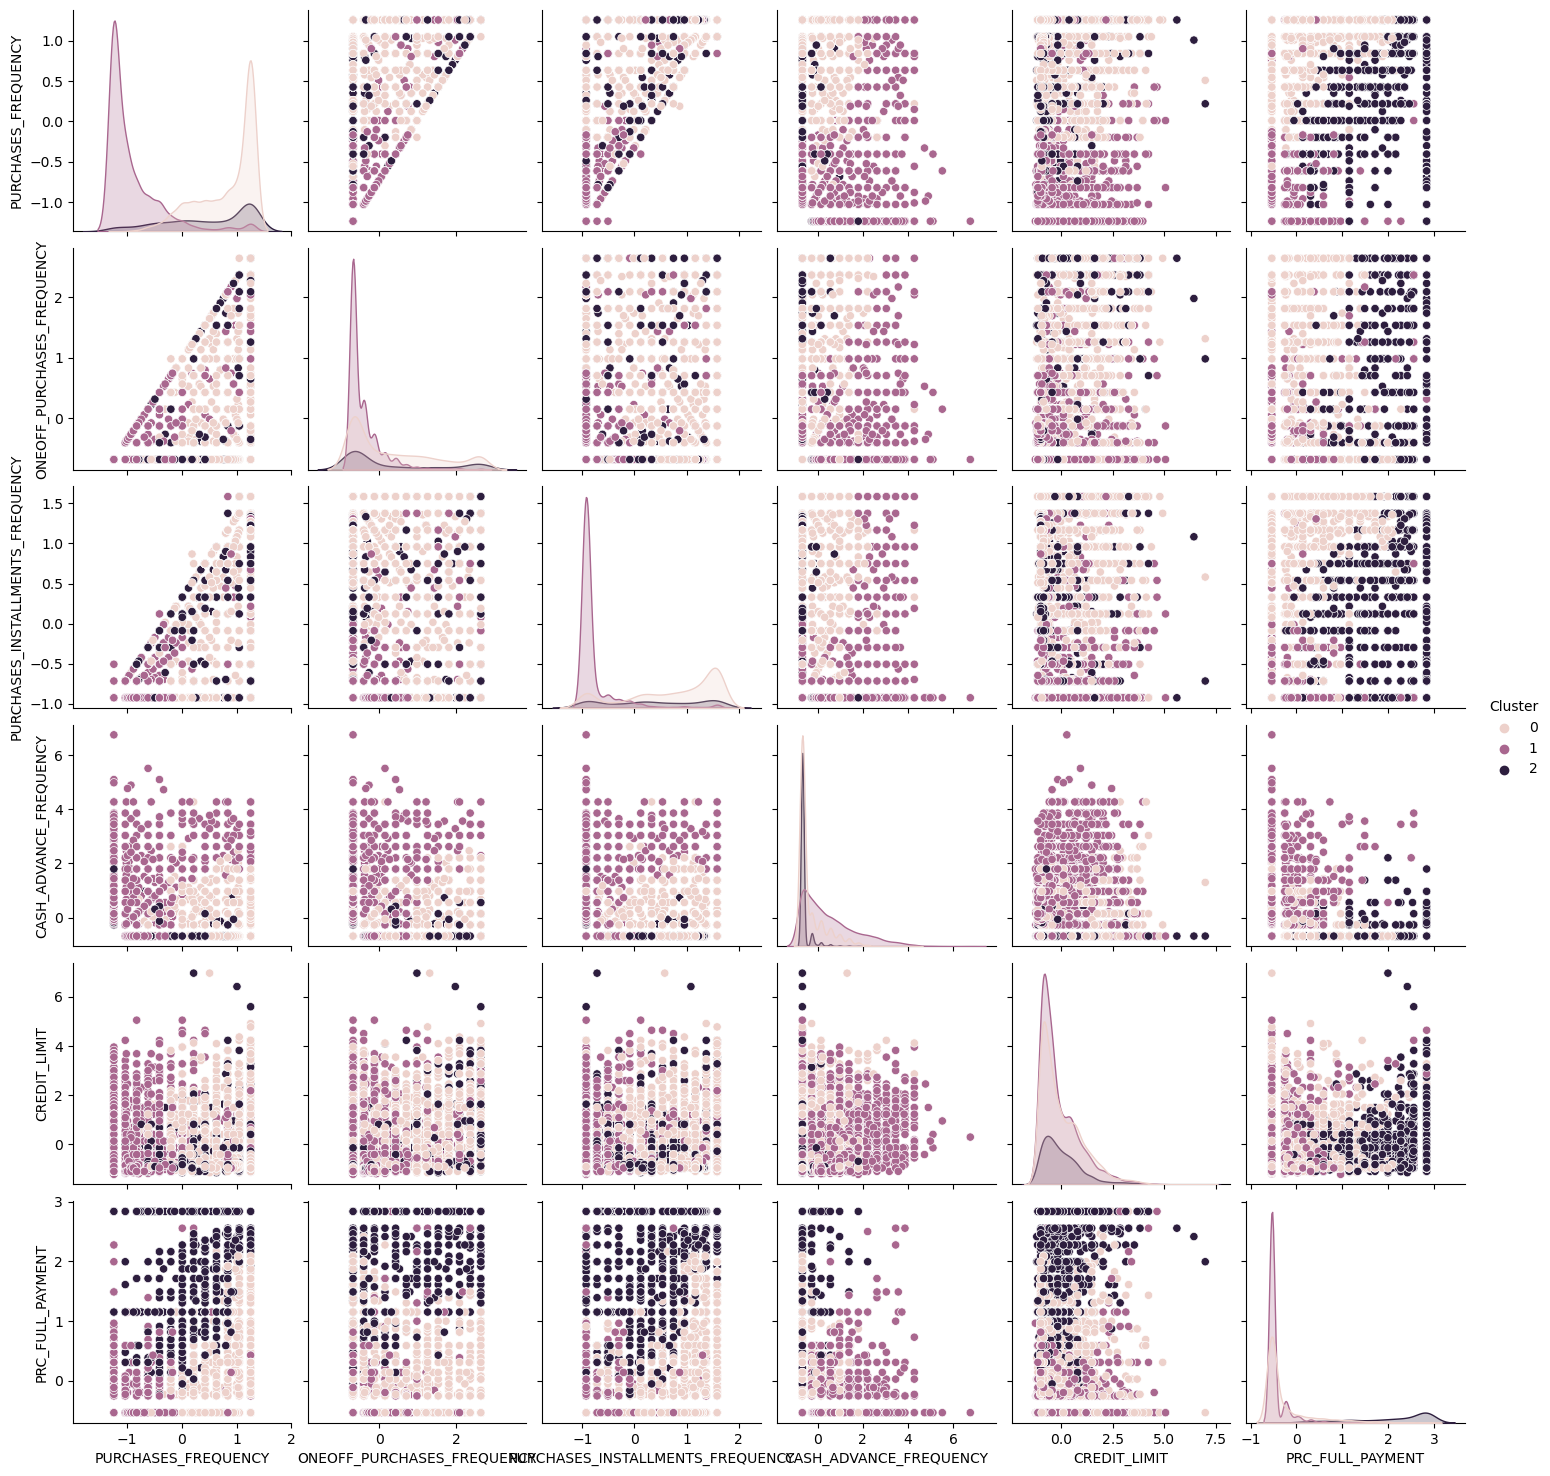

In [7]:
result = df
result['Cluster'] = AgglomerativeClustering(3).fit_predict(df)
sns.pairplot(result, hue = 'Cluster', kind = 'scatter')